# Storytelling and Visualization
### Visualize FiveThirtyEight's NFL data set.
___
Import libraries and the data set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import datetime

pd.set_option('display.max_columns', None)

# Read in the data set
games = pd.read_csv('../data/nfl_games.csv', index_col='date', parse_dates=['date'])
# Remove rows with NaN values
games = games.dropna()

games.head(3)

,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1
date,,,,,,,,,,,
1920-09-26,1920,0,0,RII,STP,1503.947,1300.0,0.824651,48,0,1.0
1920-10-03,1920,0,0,AKR,WHE,1503.420,1300.0,0.824212,43,0,1.0
1920-10-03,1920,0,0,RCH,ABU,1503.420,1300.0,0.824212,10,0,1.0


## Visualiztions
___

### 1. Points Per Game vs. Games Played
First, we calculate how many points per game (PPG) each team has scored for all of the games they've played. Then, we visualize the PPG for all teams, teams that have played more than 50 games, and teams that have played more than 150 games.

This could show a correlation between games played and PPG.

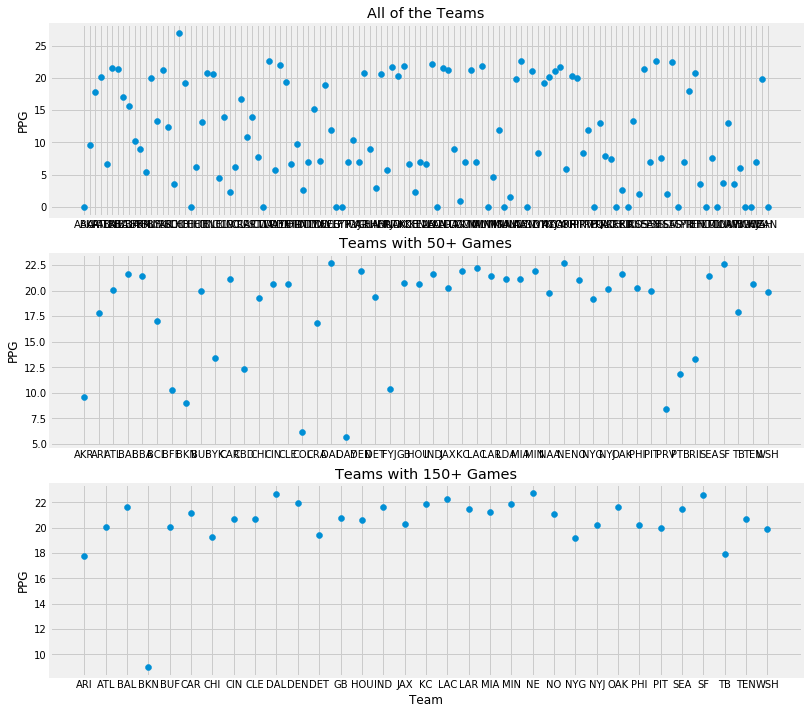

In [2]:
# Calculate the historical points per game for each team 
ppg = []
for i in np.unique(games[['team1', 'team2']].values):
    # find all instances of score1 when i == team1
    i1 = games.loc[games['team1'] == i].score1
    # find all instances of score2 when i == team2
    i2 = games.loc[games['team2'] == i].score2
    ppg.append(
        (i1.sum() + i2.sum()) / (i1.shape[0] + i2.shape[0])
    )

# Create a DataFrame for a team's ppg
ppgDf = pd.DataFrame({'team': np.unique(games[['team1', 'team2']].values), 'ppg': ppg})
ppgDfSample = ppgDf.sample(20)

# Calculate number of games each team has played
numGames = []
for i in np.unique(games[['team1', 'team2']].values):
    # find all instances of score1 when i == team1
    i1 = games.loc[games['team1'] == i].shape[0]
    # find all instances of score2 when i == team2
    i2 = games.loc[games['team2'] == i].shape[0]
    numGames.append(
        i1 + i2
    )
    
numGamesDf = pd.DataFrame({'team': np.unique(games[['team1', 'team2']].values), 'numGames': numGames})

# Merge the ppgDf and numGamesDf
ppgDf = ppgDf.merge(numGamesDf, how='inner', left_on='team', right_on='team')

# Remove teams that have played less than 50 games
ppgDf50 = (ppgDf.loc[ppgDf['numGames'] >= 50])

# Remove teams that have played less than 150 games
ppgDf150 = (ppgDf.loc[ppgDf['numGames'] >= 150])

# Plot team name vs. ppg
f, axs = plt.subplots(3,1,figsize=(12,12))

plt.subplot(311)
plt.title("All of the Teams")
plt.ylabel("PPG")
plt.scatter(ppgDf.team, ppgDf.ppg)

plt.subplot(312)
plt.title("Teams with 50+ Games")
plt.ylabel("PPG")
plt.scatter(ppgDf50.team, ppgDf50.ppg)

plt.subplot(313)
plt.title("Teams with 150+ Games")
plt.ylabel("PPG")
plt.xlabel("Team")
plt.scatter(ppgDf150.team, ppgDf150.ppg)

plt.show()

**Conclusions:**
- PPG is most variable for teams who have not played very many games.
- The teams that have played the most games tend to have a PPG between 18-22.

### 2. Seasonal PPG For Chiefs Quaterbacks
Visualize the PPG per season for different quarterbacks of the Kansas City Chiefs.
- Plot Chiefs PPG vs. season.
- Show the which quarterback(s) played in each season for the chiefs, courtesy of [wikipedia](https://en.wikipedia.org/wiki/List_of_Kansas_City_Chiefs_starting_quarterbacks).

This could show how PPG for a season affects how many seasons a quarterback plays.

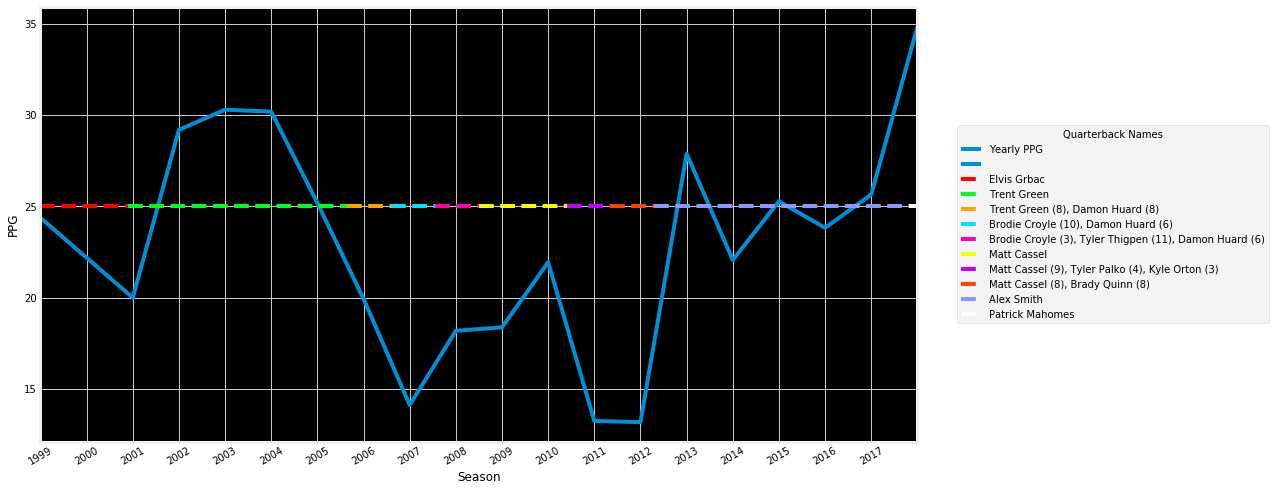

In [3]:
# Store the date and score for each Chiefs game
chiefsGames1 = (games.loc[games['team1'] == "KC"][['season', 'score1']])
chiefsGames1.rename(columns={"score1": "score"}, inplace=True)
chiefsGames2 = (games.loc[games['team2'] == "KC"][['season', 'score2']])
chiefsGames2.rename(columns={"score2": "score"}, inplace=True)
chiefsGames = pd.concat([chiefsGames1, chiefsGames2])

# Store the Chiefs games that occured in the 2000 or after
chiefsGamesRecent = (chiefsGames.loc[chiefsGames.season >= 1999])

# Average PPG for each season the Chiefs play  
cgrSeasonAvgScores = chiefsGamesRecent.groupby('season').mean()

# Plot
fig, ax = plt.subplots(figsize=(14,8))
sns.lineplot(data=cgrSeasonAvgScores)

plt.axhline(y=25, xmin=0, xmax=.1, linestyle='--', c='#ff0000')
plt.axhline(y=25, xmin=.1, xmax=.35, linestyle='--', c='#00ff1e')
plt.axhline(y=25, xmin=.35, xmax=.4, linestyle='--', c='#ffa200')
plt.axhline(y=25, xmin=.4, xmax=.45, linestyle='--', c='#00e1ff')
plt.axhline(y=25, xmin=.45, xmax=.5, linestyle='--', c='#ff00aa')
plt.axhline(y=25, xmin=.5, xmax=.6, linestyle='--', c='#f2ff00')
plt.axhline(y=25, xmin=.6, xmax=.65, linestyle='--', c='#c300ff')
plt.axhline(y=25, xmin=.65, xmax=.7, linestyle='--', c='#ff4400')
plt.axhline(y=25, xmin=.7, xmax=.99, linestyle='--', c='#8c96ff')
plt.axhline(y=25, xmin=.99, xmax=1, linestyle='--', c='#ffffff')
plt.legend(
    bbox_to_anchor=(1.04,.5),
    loc="center left",
    title="Quarterback Names",
    # Only list quarterbacks that played more than 1 game.
    # If multiple quarterbacks played in a season, show all
    # of them and show how many games each played.
    labels=(
        "Yearly PPG",
        "",
        "Elvis Grbac",
        "Trent Green",
        "Trent Green (8), Damon Huard (8)",
        "Brodie Croyle (10), Damon Huard (6)",
        "Brodie Croyle (3), Tyler Thigpen (11), Damon Huard (6)",
        "Matt Cassel",
        "Matt Cassel (9), Tyler Palko (4), Kyle Orton (3)",
        "Matt Cassel (8), Brady Quinn (8)",
        "Alex Smith",
        "Patrick Mahomes"
    )
)

plt.xlim(1999, 2018)
plt.xticks(np.arange(1999, 2018, 1))
ax.tick_params(axis ='x', rotation = 30)
ax.set_facecolor((0, 0, 0))
plt.xlabel("Season")
plt.ylabel("PPG")
plt.show()

**Conclusion:** PPG is correlated with job security. Quarterbacks who did not play very long for the Chiefs tended to have worse PPG, and quarterbacks who had better and more consistent production remained at their position longer. This pattern likely extends to other teams.

### 3. Team Point Differential For Recent Seasons
Point differential for a game is your team's score minus the other team's score. Point differential for a season, which I will be calculating, is the sum of the point differentials for each game. Positively high point differentials indicates success, because you either score lots of points, prevent the other team from scoring lots of points, or both.

I will display the season point differential for each team for multiple seasons. This could show patterns in teams' point differential and overall success.

Text(0.5, 1, 'Seasonal Point Differential')

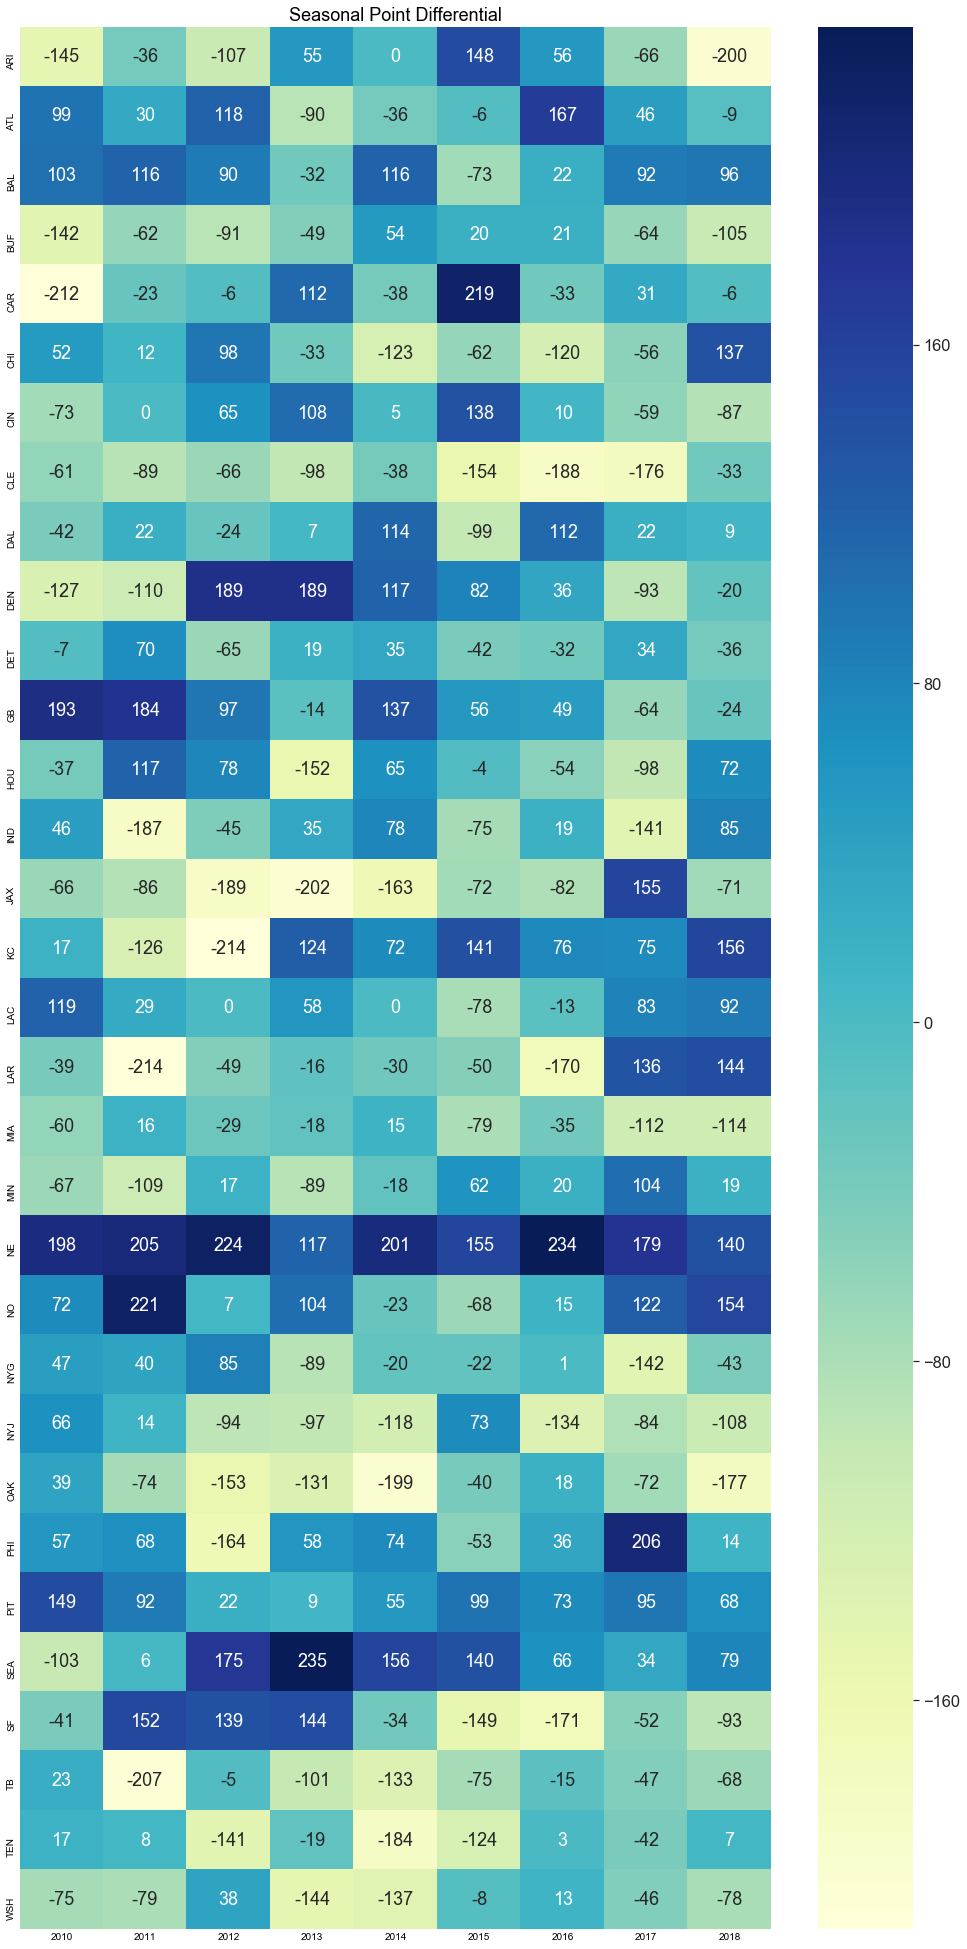

In [4]:
# Grab recent games
recentGames = (games.loc[games.season >= 2010])

# Make a dataframe for each team's point differential for recent seasons
ptDiff = pd.DataFrame(
    index=np.unique(recentGames[['team1', 'team2']].values),
    columns=np.unique(recentGames['season'].values)
)

# Calculate the point differential for each team in each season
for i in np.unique(recentGames[['team1', 'team2']].values):
    teamPtDiff = []
    for j in np.unique(recentGames['season'].values):
        i1 = recentGames.loc[(recentGames['season'] == j) & (recentGames['team1'] == i)][['score1', 'score2']]
        i1PtDiff = i1['score1'] - i1['score2']
        i2 = recentGames.loc[(recentGames['season'] == j) & (recentGames['team2'] == i)][['score1', 'score2']]
        i2PtDiff = i2['score2'] - i2['score1']
        iPtDiff = sum(i1PtDiff) + sum(i2PtDiff) 
        teamPtDiff.append(iPtDiff)
    ptDiff.loc[i] = teamPtDiff

f, ax = plt.subplots(figsize=(15,35))
sns.set(font_scale=1.5)
sns.heatmap(ptDiff, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Seasonal Point Differential")

**Conclusions:** 
- Very few teams consistently have positively high or positively low point differentials.
- Many teams have sudden jumps of ~200 points between consecutive seasons.
  - This could indicate that offseason changes, whether that be adding/removing coaches or players, makes a big impact on performance.

### 4. PPG Per Month
Calculate the PPG for all the games that occur in each month. This could indicate that scores are higher/lower in certain months.

Number of games in January: 552
Number of games in February: 17
Number of games in August: 22
Number of games in September: 3109
Number of games in October: 4462
Number of games in November: 4521
Number of games in December: 3591


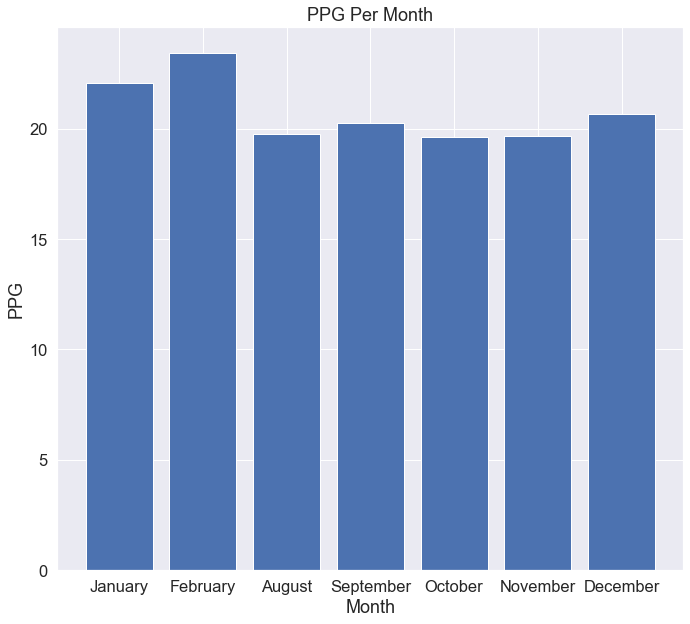

In [6]:
monthlyPPG = []
gamesPerMonth = []
for i in range(1,13):
    p = games.loc[games.index.month == i][['score1', 'score2']]
    if (p.shape[0] > 0):
        monthlyPPG.append((i, (sum(p['score1']) + sum(p['score2'])) / (2 * p.shape[0])))
        gamesPerMonth.append((i, p.shape[0]))

month = list(zip(*monthlyPPG))[0]
month = list(map(lambda x: datetime.date(2000, x, 1).strftime("%B"), month))
PPG = list(zip(*monthlyPPG))[1]

f, ax = plt.subplots(figsize=(10,10))

x_pos = np.arange(len(month))
plt.bar(x_pos, PPG)
plt.xticks(x_pos, month)
plt.xlabel("Month")
plt.ylabel("PPG")
plt.title("PPG Per Month")

for i in gamesPerMonth:
    print("Number of games in %s: %d" % (datetime.date(2000, i[0], 1).strftime("%B"), i[1]))

**Conclusions:** 
- The playoffs start in January, so the higher PPG in January could indicate that playoff teams score more points.
- Feburary (17) and August (22) have too few games to truly consider.
- September and December have slightly higher PPG. Because of this, winter weather does not seem to be correlated with score.